<a href="https://colab.research.google.com/github/sebascaviglia/ANALISIS_FACTORIAL/blob/main/Salario_ARS_CCL_MERVAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 7.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=7aca9b2755b15a3799a01002ce864d74dde5f21f815d8f718671e69759e39afe
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

url= 'https://www.indec.gob.ar/ftp/cuadros/sociedad/variaciones_salarios_09_21.xls'
base_oct_2016 = pd.read_excel(url, skiprows=7).iloc[:,7].dropna().pct_change()

url2 = 'https://www.indec.gob.ar/ftp/cuadros/sociedad/serie_is_2012.xls'
base_abr_2012 = pd.read_excel(url2, sheet_name='Serie histórica IS', skiprows=6).iloc[:,4].dropna().pct_change()
base_abr_2012.iloc[0] = 0

variacion_salarial_ars = pd.concat([base_abr_2012,base_oct_2016]).dropna().tolist()

data = yf.download(['GGAL.BA','GGAL','^MERV'], auto_adjust=True)['Close']
data['CCL'] = data['GGAL.BA'] / data['GGAL']*10
data.dropna(inplace=True)
data = data.resample('M').last()

data = data.iloc[len(data)-len(variacion_salarial_ars)-2:].copy() 

for i in range(len(data)-len(variacion_salarial_ars)):
    variacion_salarial_ars.append(0)

data['Variacion_Salarios_ARS'] = variacion_salarial_ars
data['Salarios_ARS'] = data['Variacion_Salarios_ARS'].add(1).cumprod()
data['Salarios_CCL'] = data['Salarios_ARS'] / data['CCL'] * 880  #Salario medio 2001 ARS 880 (dato clarin)
data['Merval_CCL'] = data['^MERV'] / data['CCL']
data

[*********************100%***********************]  3 of 3 completed


,GGAL,GGAL.BA,^MERV,CCL,Variacion_Salarios_ARS,Salarios_ARS,Salarios_CCL,Merval_CCL
Date,,,,,,,,
2001-10-31,5.138316,0.524663,224.750000,1.021079,0.000000,1.000000,861.833020,220.110194
2001-11-30,3.652876,0.384435,202.449997,1.052417,-0.000860,0.999140,835.451327,192.366736
2001-12-31,3.036277,0.440717,295.390015,1.451504,-0.001469,0.997672,604.856200,203.506153
2002-01-31,2.756006,0.562820,439.200012,2.042159,-0.002614,0.995064,428.789396,215.066549
2002-02-28,1.401359,0.262331,398.250000,1.871979,-0.000941,0.994127,467.329961,212.742752
...,...,...,...,...,...,...,...,...
2021-05-31,8.880000,145.399994,59212.968750,163.738730,0.032894,74.670127,401.308303,361.630806
2021-06-30,8.620000,146.600006,62371.949219,170.069615,0.025344,76.562591,396.161772,366.743638
2021-07-31,7.810000,142.550003,66005.289062,182.522412,0.054654,80.747039,389.307775,361.628406


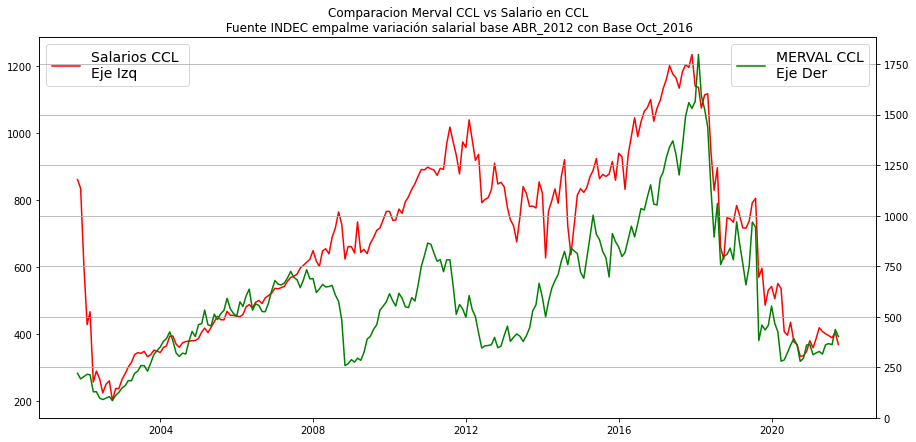

In [ ]:
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(data.Salarios_CCL, color='red', label='Salarios CCL \nEje Izq')
ax.legend(loc='upper left', fontsize=14)

ax2 = ax.twinx()
ax2.plot(data.Merval_CCL, color='green', label='MERVAL CCL\nEje Der')
ax2.legend(loc='upper right', fontsize=14)
ax2.grid()

ax.set_title('Comparacion Merval CCL vs Salario en CCL\n \
Fuente INDEC empalme variación salarial base ABR_2012 con Base Oct_2016')

plt.show()

In [ ]:
data.Salarios_CCL.corr(data.Merval_CCL)

0.7844798325800815